# German Credit Risk

Você trabalha em um banco e deve treinar um modelo que avalie o risco de conceder crédito aos clientes. Quando um cliente fizer um pedido de empréstimo, o modelo deve dizer se é seguro conceder o crédito. A base de dados contém alguns atributos cujos nomes não são tão intuitivos no seu significado. Por isso, abaixo, cito alguns e o que eu acredito que eles representam já que a fonte não contém nenhuma informação adicional sobre isso.

*   checking_status: status da **conta corrente** de um cliente.

*   savings_status: status da **poupança** de um cliente.

*   duration: tempo em meses que espera-se que o cliente pague a dívida.

*   credit_history: representam diferentes categorias ou descrições do histórico de crédito dos clientes.
    *   existing paid: esta categoria sugere que o cliente possui um histórico de crédito com créditos existentes que foram quitados.
    *   delayed previously: o cliente tem um histórico de pagamentos atrasados no passado.
    *   critical/other existing: o cliente tem um histórico de crédito crítico ou outros créditos existentes que podem afetar sua credibilidade.
    *   no credits/all paid: o cliente não tem histórico de crédito ou pagou todos os créditos anteriores.
    *   all paid: o cliente possui um histórico de crédito com todos os créditos anteriores quitados.

*   employment: indica há quanto tempo o indivíduo está empregado ou o status de seu emprego.
    *   " >=7 ": sugere que o cliente está empregado há pelo menos sete anos.
    *   "1 <= X < 4": o cliente está empregado há pelo menos um ano, mas menos de quatro anos.
    *   "4 <= X < 7": o cliente está empregado há pelo menos quatro anos, mas menos de sete anos.
    *   "unemployed": o cliente está atualmente desempregado.
    *   " < 1": o cliente está empregado há menos de um ano.

*   installment_commitment: representa o número de compromissos de parcelamento que o solicitante possui atualmente. Um compromisso de parcelamento refere-se a uma obrigação financeira de pagar um empréstimo ou crédito em parcelas regulares durante um período especificado. Em outras palavras, a quantidade de empréstimos que o solicitante já possui.

*   other_parties: refere-se ao envolvimento de quaisquer partes adicionais no processo de pedido de empréstimo. Indica se existem outros indivíduos ou entidades associadas ao pedido de empréstimo além do requerente principal.
    *   none: não há outras partes envolvidas no pedido de empréstimo, ou seja, o requerente principal é o único responsável pelo empréstimo.
    *   guarantor: indica a presença de um fiador para o empréstimo.
    *   co applicant: existe um co-requerente envolvido no pedido de empréstimo. Um co-requerente é outra pessoa que compartilha a responsabilidade de reembolsar o empréstimo com o requerente principal. Tanto o requerente principal como o co-requerente são igualmente responsáveis pelo empréstimo.

*   residence_since: representa a duração da residência em anos para o solicitante. Indica há quanto tempo a pessoa mora em sua residência atual.

*   property_magnitude: refere-se à magnitude ou tipo de propriedade dos solicitantes do empréstimo.

*   other_payment_plans: diz se o cliente tem outras dívidas com lojas ou bancos.
    *   none: o cliente não possui outros planos de pagamento além de seus compromissos financeiros existentes.
    *   bank: o cliente possui outro plano de pagamento com um banco.
    *   stores: o cliente possui outro plano de pagamento com lojas ou estabelecimentos de varejo.

*   existing_credits: Indica o número de empréstimos ou linhas de crédito que o cliente tomou antes do pedido de empréstimo atual.

Fonte: https://www.kaggle.com/datasets/ppb00x/credit-risk-customers

# Initial imports

In [ ]:
%pip install ipython-autotime  --upgrade

In [2]:
from google.colab import drive, files
import pandas as pd
drive.mount('/content/drive', force_remount=True)
%load_ext autotime

Mounted at /content/drive
time: 454 µs (started: 2023-06-27 13:35:57 +00:00)


In [3]:
dataset = pd.read_csv("/content/drive/MyDrive/datasets/credit-risk-customers/credit_customers.csv", encoding='utf-8')

time: 992 ms (started: 2023-06-27 13:35:57 +00:00)


# EDA

In [4]:
dataset['installment_commitment'].unique()

array([4., 2., 3., 1.])

time: 16.7 ms (started: 2023-06-27 13:35:58 +00:00)


In [ ]:
dataset

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,male single,none,...,real estate,67.0,none,own,2.0,skilled,1.0,yes,yes,good
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,female div/dep/mar,none,...,real estate,22.0,none,own,1.0,skilled,1.0,none,yes,bad
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,male single,none,...,real estate,49.0,none,own,1.0,unskilled resident,2.0,none,yes,good
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,male single,guarantor,...,life insurance,45.0,none,for free,1.0,skilled,2.0,none,yes,good
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,male single,none,...,no known property,53.0,none,for free,2.0,skilled,2.0,none,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking,12.0,existing paid,furniture/equipment,1736.0,<100,4<=X<7,3.0,female div/dep/mar,none,...,real estate,31.0,none,own,1.0,unskilled resident,1.0,none,yes,good
996,<0,30.0,existing paid,used car,3857.0,<100,1<=X<4,4.0,male div/sep,none,...,life insurance,40.0,none,own,1.0,high qualif/self emp/mgmt,1.0,yes,yes,good
997,no checking,12.0,existing paid,radio/tv,804.0,<100,>=7,4.0,male single,none,...,car,38.0,none,own,1.0,skilled,1.0,none,yes,good
998,<0,45.0,existing paid,radio/tv,1845.0,<100,1<=X<4,4.0,male single,none,...,no known property,23.0,none,for free,1.0,skilled,1.0,yes,yes,bad


time: 45.5 ms (started: 2023-06-26 14:05:02 +00:00)


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   checking_status         1000 non-null   object 
 1   duration                1000 non-null   float64
 2   credit_history          1000 non-null   object 
 3   purpose                 1000 non-null   object 
 4   credit_amount           1000 non-null   float64
 5   savings_status          1000 non-null   object 
 6   employment              1000 non-null   object 
 7   installment_commitment  1000 non-null   float64
 8   personal_status         1000 non-null   object 
 9   other_parties           1000 non-null   object 
 10  residence_since         1000 non-null   float64
 11  property_magnitude      1000 non-null   object 
 12  age                     1000 non-null   float64
 13  other_payment_plans     1000 non-null   object 
 14  housing                 1000 non-null   o

Obtendo os nomes dos atributos numéricos e categóricos para facilitar as análises.

In [5]:
categorical = list()
numerical   = list()

for name in dataset.columns:
  if dataset[name].dtype == 'object':
    categorical.append(name)
  else:
    numerical.append(name)

print(f'Categorical features: {categorical}')
print(f'Numerical features: {numerical}')

Categorical features: ['checking_status', 'credit_history', 'purpose', 'savings_status', 'employment', 'personal_status', 'other_parties', 'property_magnitude', 'other_payment_plans', 'housing', 'job', 'own_telephone', 'foreign_worker', 'class']
Numerical features: ['duration', 'credit_amount', 'installment_commitment', 'residence_since', 'age', 'existing_credits', 'num_dependents']
time: 7.42 ms (started: 2023-06-27 13:36:05 +00:00)


Agora, vejamos quantas classes há em cada atributo categórico.

In [6]:
for name in categorical:
  print(f'{name}: {list(dataset[name].unique())}')

checking_status: ['<0', '0<=X<200', 'no checking', '>=200']
credit_history: ['critical/other existing credit', 'existing paid', 'delayed previously', 'no credits/all paid', 'all paid']
purpose: ['radio/tv', 'education', 'furniture/equipment', 'new car', 'used car', 'business', 'domestic appliance', 'repairs', 'other', 'retraining']
savings_status: ['no known savings', '<100', '500<=X<1000', '>=1000', '100<=X<500']
employment: ['>=7', '1<=X<4', '4<=X<7', 'unemployed', '<1']
personal_status: ['male single', 'female div/dep/mar', 'male div/sep', 'male mar/wid']
other_parties: ['none', 'guarantor', 'co applicant']
property_magnitude: ['real estate', 'life insurance', 'no known property', 'car']
other_payment_plans: ['none', 'bank', 'stores']
housing: ['own', 'for free', 'rent']
job: ['skilled', 'unskilled resident', 'high qualif/self emp/mgmt', 'unemp/unskilled non res']
own_telephone: ['yes', 'none']
foreign_worker: ['yes', 'no']
class: ['good', 'bad']
time: 23.4 ms (started: 2023-06-27 1

Obtendo dados adicionais dos atributos numéricos.

In [ ]:
dataset[numerical].describe()

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


time: 37.3 ms (started: 2023-06-26 14:05:16 +00:00)


Vou verificar se há valores ausentes no conjunto de dados.

In [ ]:
print(f'NaN values: {dataset.isna().sum().sum()}')

NaN values: 0
time: 7.76 ms (started: 2023-06-21 23:58:34 +00:00)


## Data visualization

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

colors = sns.color_palette()

time: 827 ms (started: 2023-06-27 13:47:20 +00:00)


### Label
Vou verificar a distribuição das classes da label.

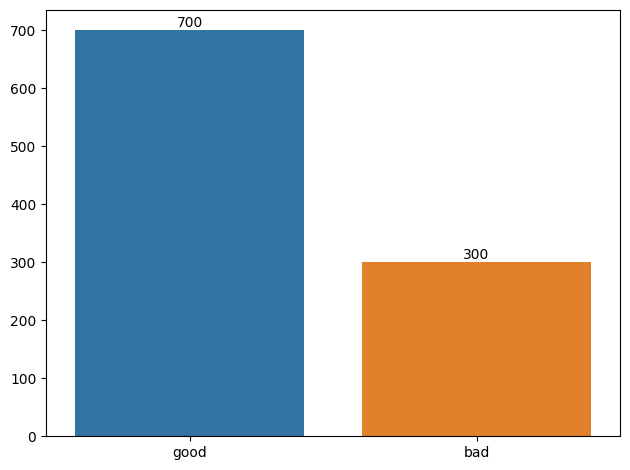

time: 900 ms (started: 2023-06-27 13:47:23 +00:00)


In [8]:
classes = dataset['class'].value_counts()
x = sns.barplot(x=classes.index, y=classes.values)
x.bar_label(x.containers[0])
plt.tight_layout()
plt.show()

O gráfico acima mostra um grande desequilíbrio de classes. Levando em conta o problema, considero um desequilíbrio natural uma  vez que há muito mais pessoas com equilíbrio financeiro e consideradas boas pagadoras do que o contrário.

### Categorical
Vou visualizar todos os atributos categóricos de uma vez usando a função subplots(). Isso será feito da seguinte forma. Cada gráfico terá apenas duas barras principais, uma representando os usuários considerados bons pagadores(label='good') e a outra representando os maus pagadores(label='bad'). Em cada uma haverá sub-barras empilhadas representando as classes de um atributo.

Meu critério para decisão se há diferença entre os grupos de clientes 'good' e 'bad' será os padrões formados pelas sub-barras. O padrão identificado em 'label=good' deve ser diferente do formado em 'label=bad' para que possamos concluir que um atributo é relevante na classificação.

Por exemplo, suponhamos que há  um atributo 'cor_camisa' com apenas duas classes 'vermelha' e 'azul'. A imagem abaixo demonstra um exemplo de situação onde este atributo é ruim para a classificação da label. Digamos que há uma proporção de 50% de camisas azuis e 50% de camisas vermelhas em ambos os grupos. Neste caso, verificar a cor da camisa do cliente não é útil para prever a qual classe ele pertence.

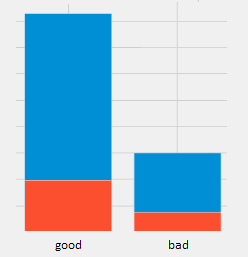

Agora, se identificarmos uma diferença entre os padrões de 'good' e 'bad' podemos ter mais segurança em dizer que 'cor_camisa' é um bom preditor da label. No exemplo abaixo, note que as proporções se invertem. Digamos que há 90% de camisas azuis e 10 % de vermelhas no grupo 'good' e o contrário no 'bad'. Nesse caso, se desejarmos saber a qual classe um cliente pertence podemos verificar a cor da sua camisa para termos 90% de certeza.

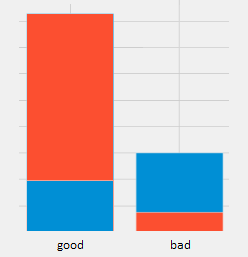

---

Vejamos os gráficos do dataset.

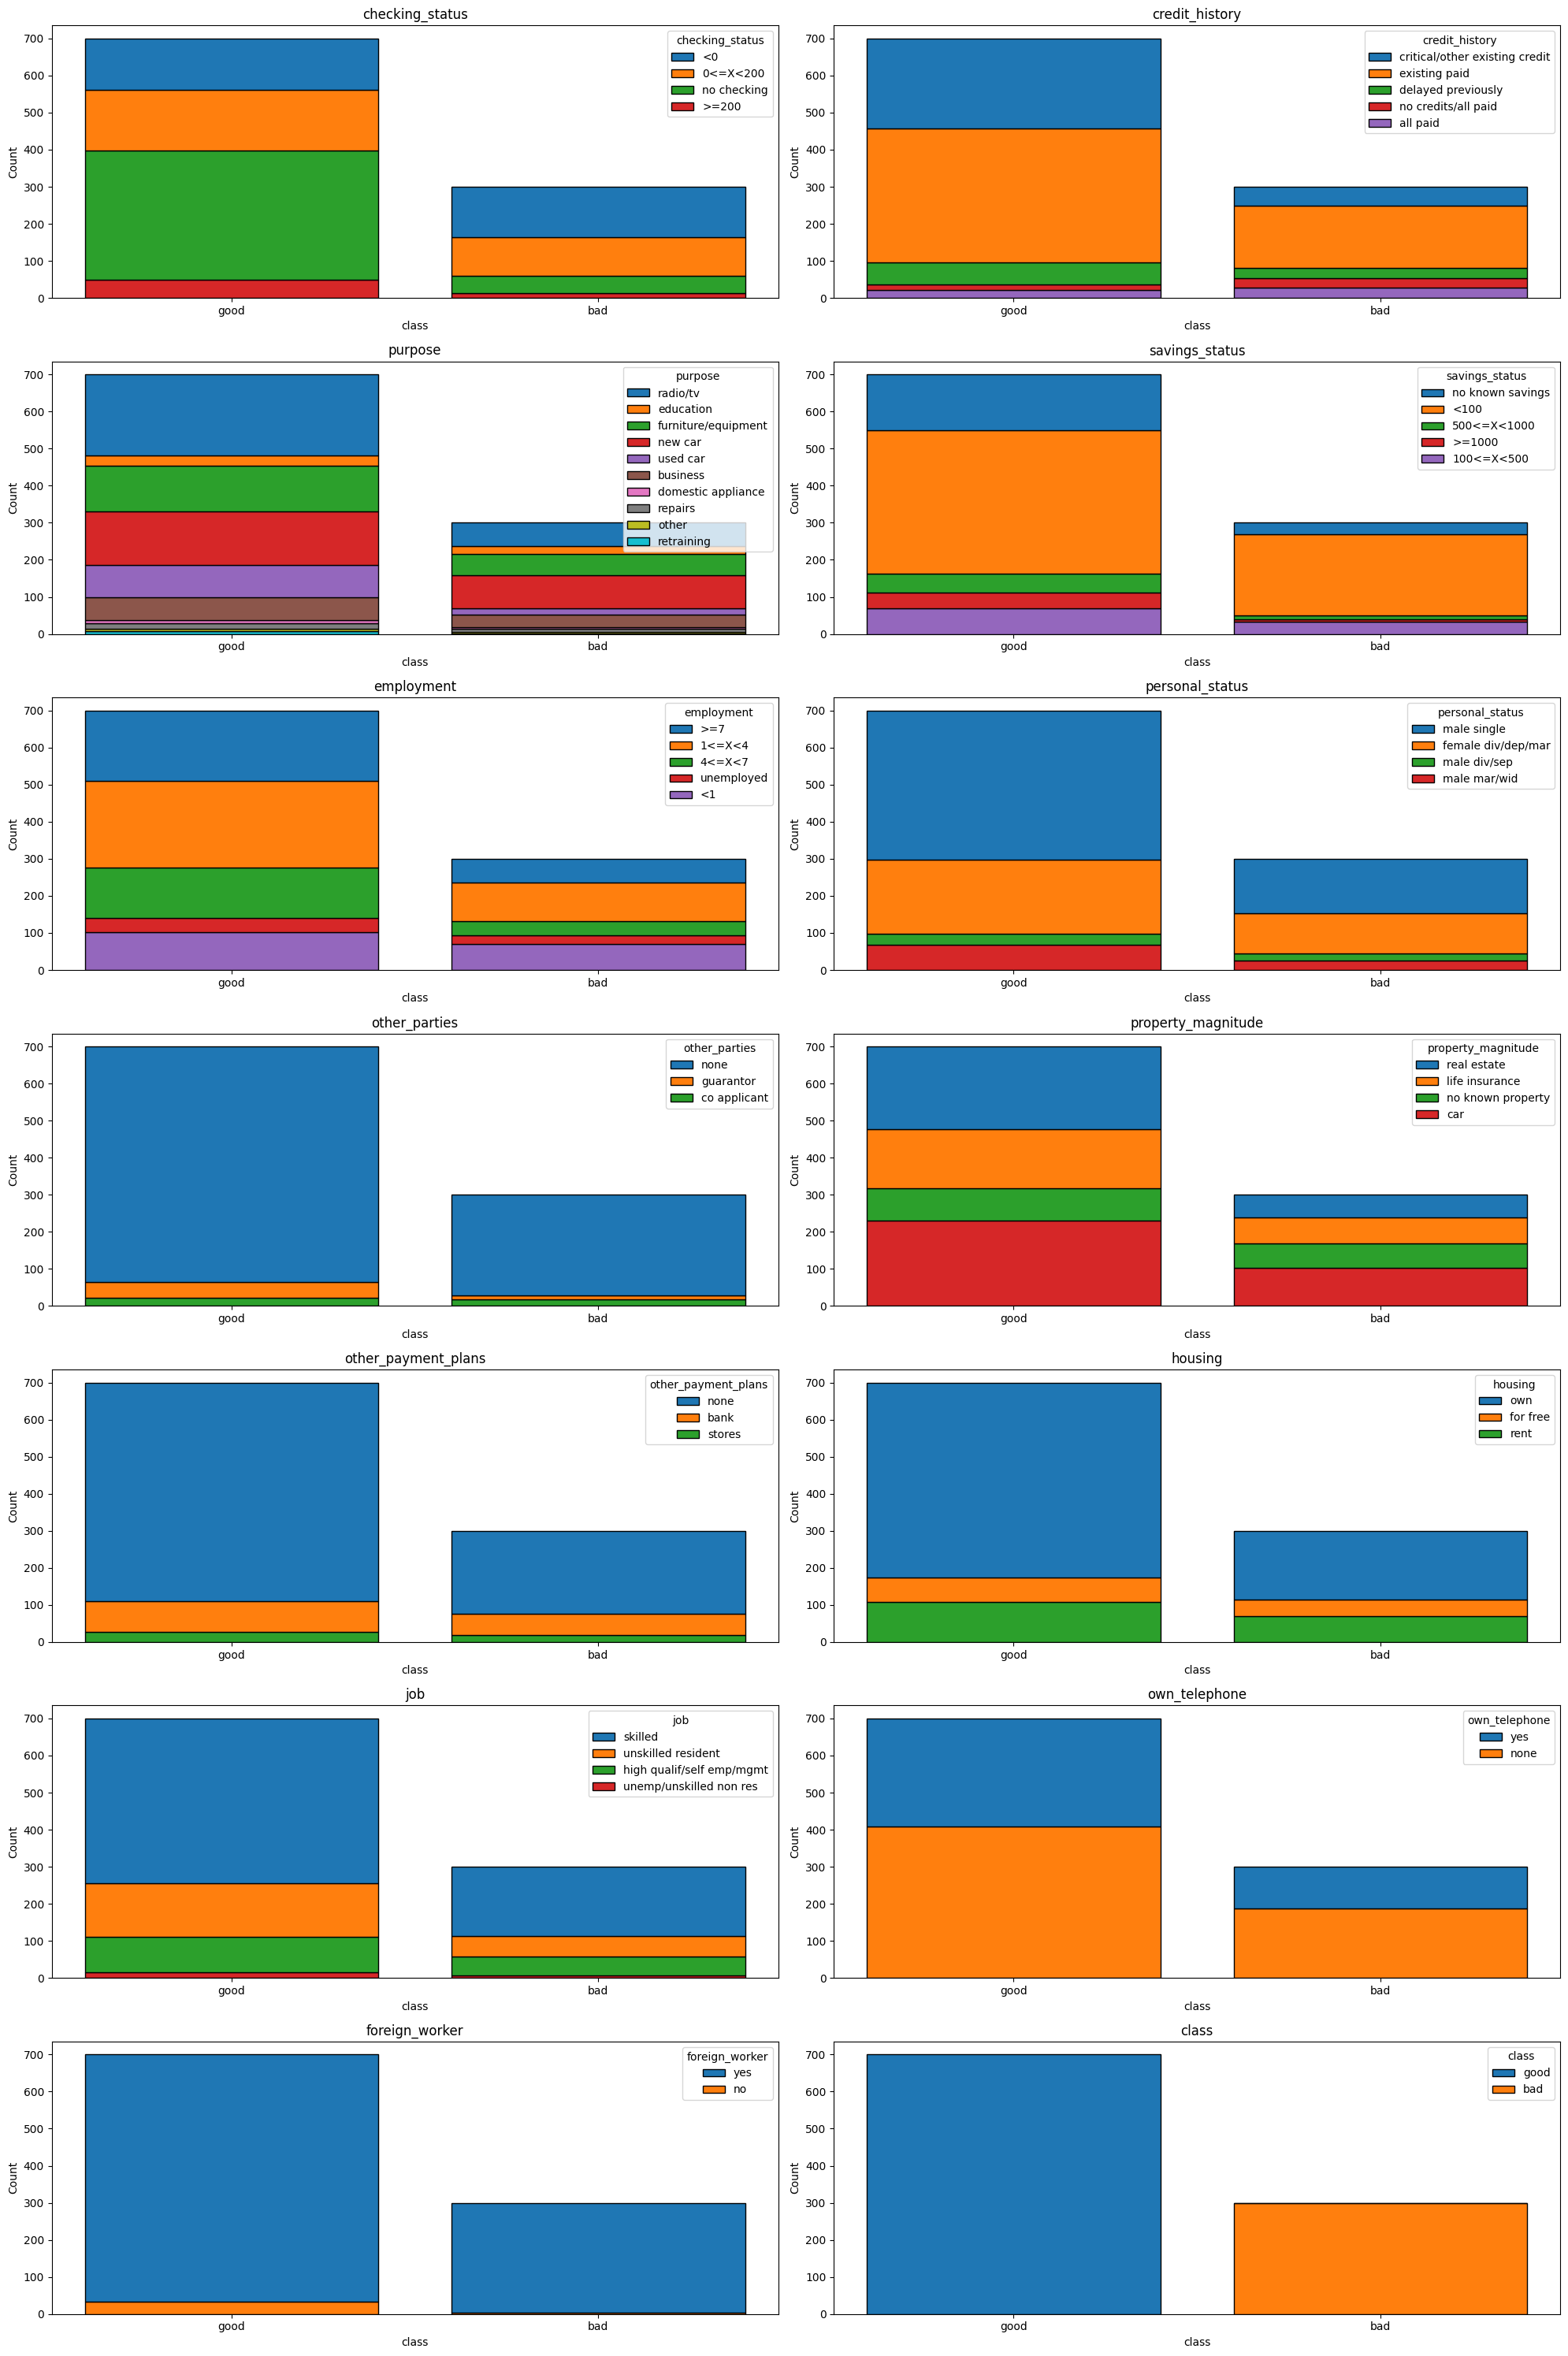

time: 5.83 s (started: 2023-06-27 13:47:49 +00:00)


In [9]:
fig, ax = plt.subplots(7, 2, figsize=(20, 30))
for name, axis in zip(dataset[categorical], ax.ravel()):
  sns.histplot(data=dataset, x='class', hue=name, alpha=1.0, multiple='stack', shrink=0.8, ax=axis)
  axis.set_title(name)
plt.tight_layout()
plt.show()

### Numerical
Vou fazer o mesmo tipo de visualização em alguns atributos numéricos discretos.

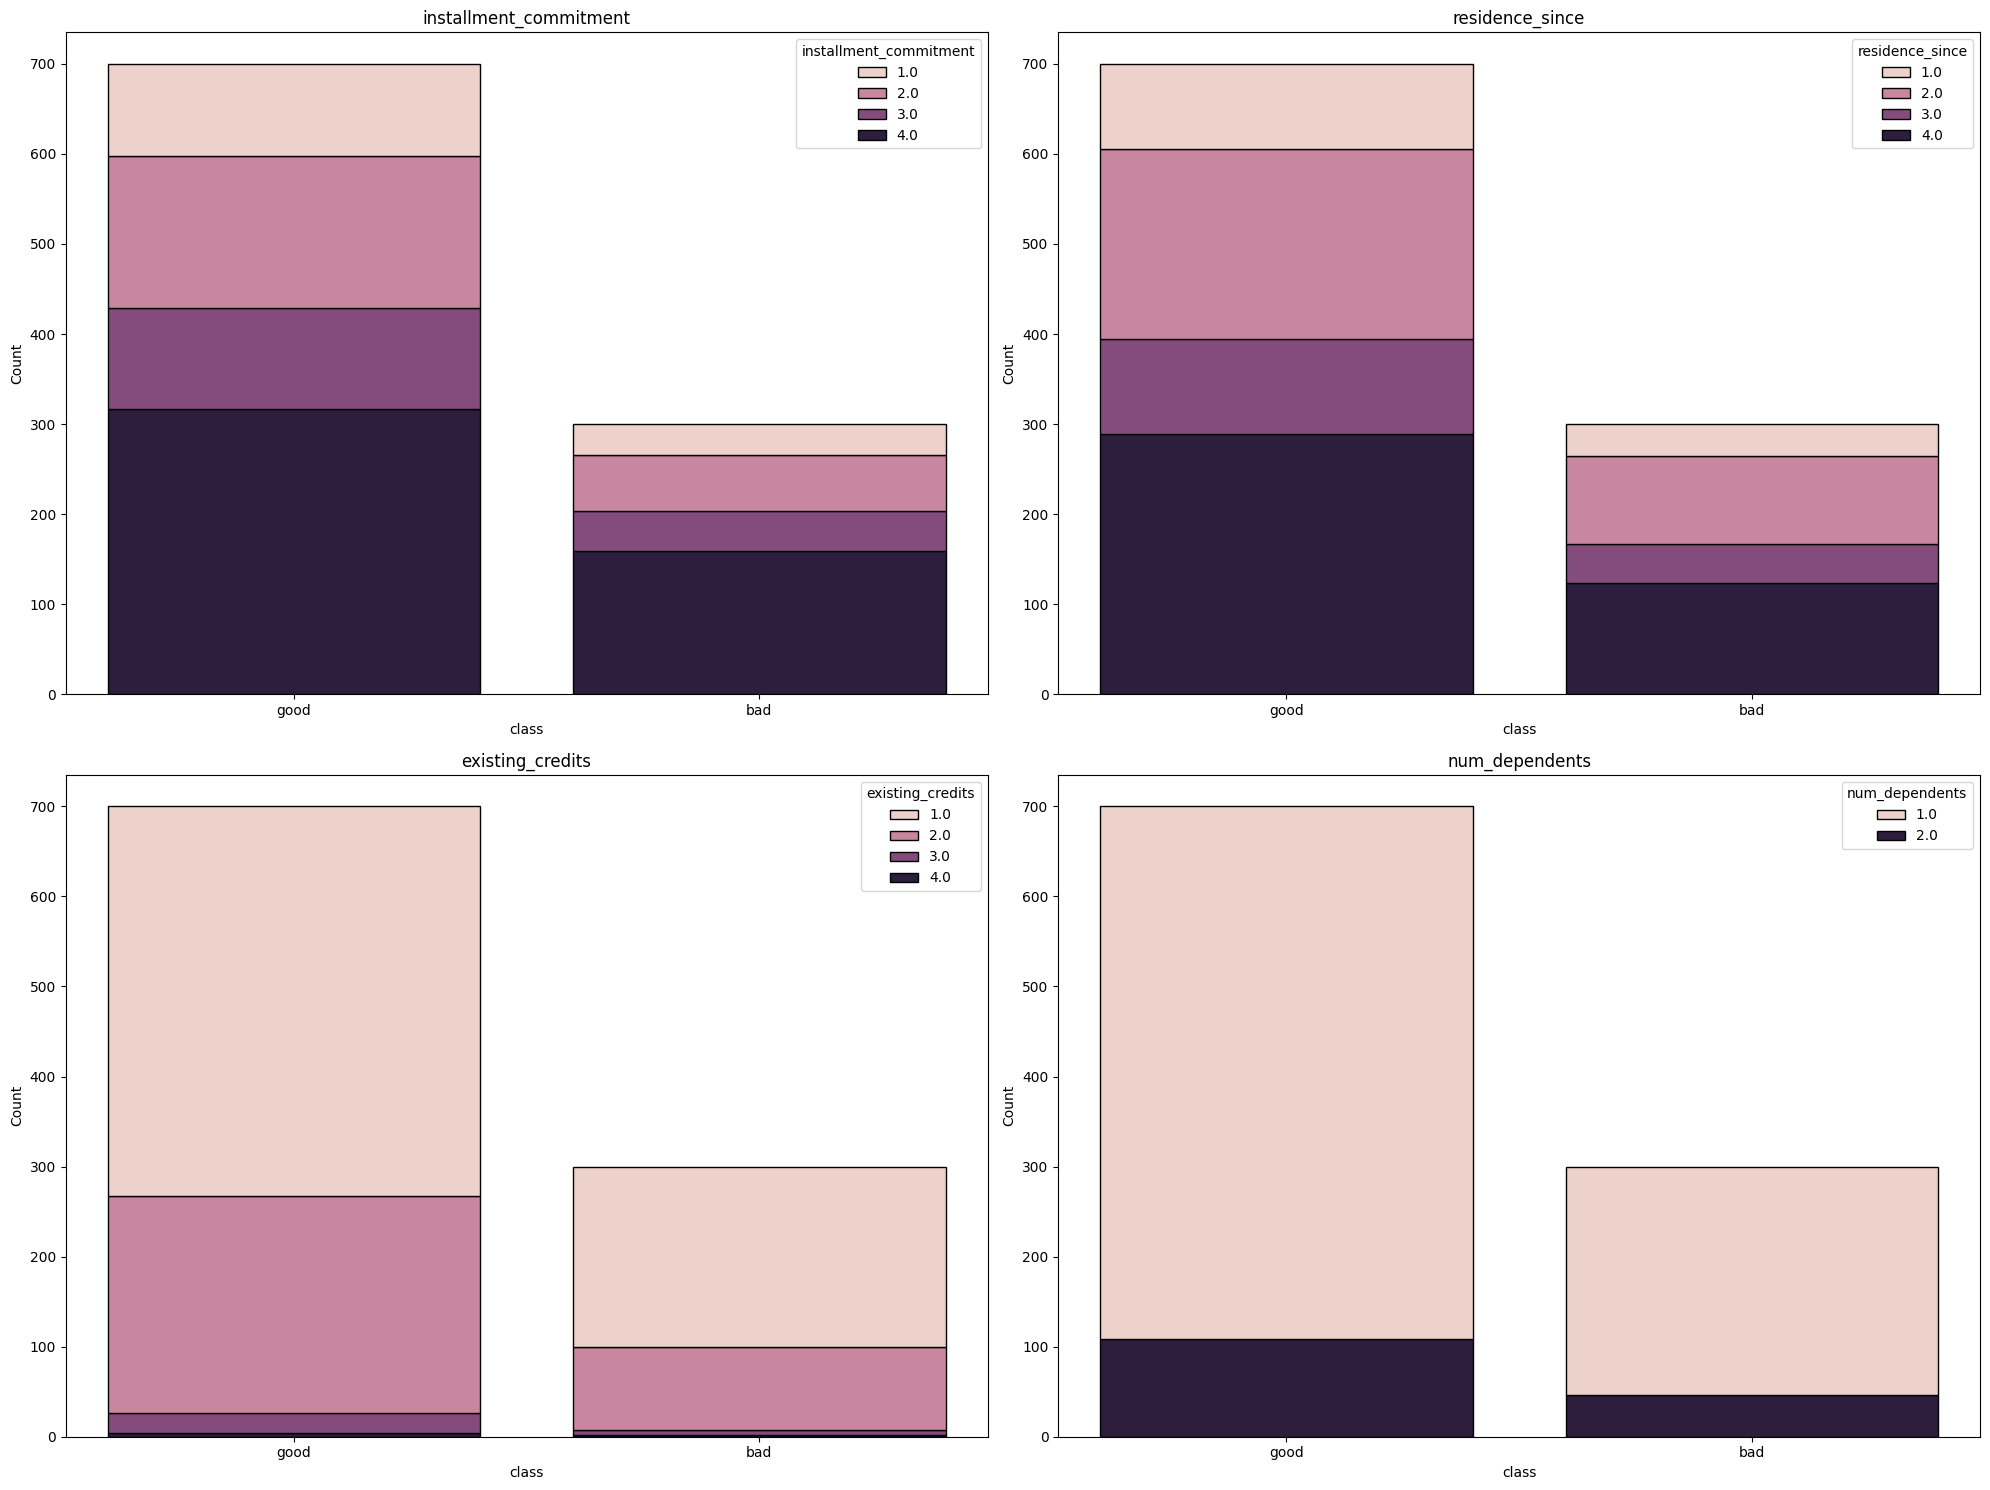

time: 3.04 s (started: 2023-06-27 14:09:01 +00:00)


In [28]:
discrete = ['installment_commitment', 'residence_since', 'existing_credits', 'num_dependents']
fig, ax = plt.subplots(2, 2, figsize=(20, 15))
for name, axis in zip(dataset[discrete], ax.ravel()):
  sns.histplot(data=dataset, x='class', hue=name, alpha=1.0, multiple='stack', shrink=0.8, ax=axis)
  axis.set_title(name)
plt.tight_layout()
plt.show()

Agora, os atributos contínuos.

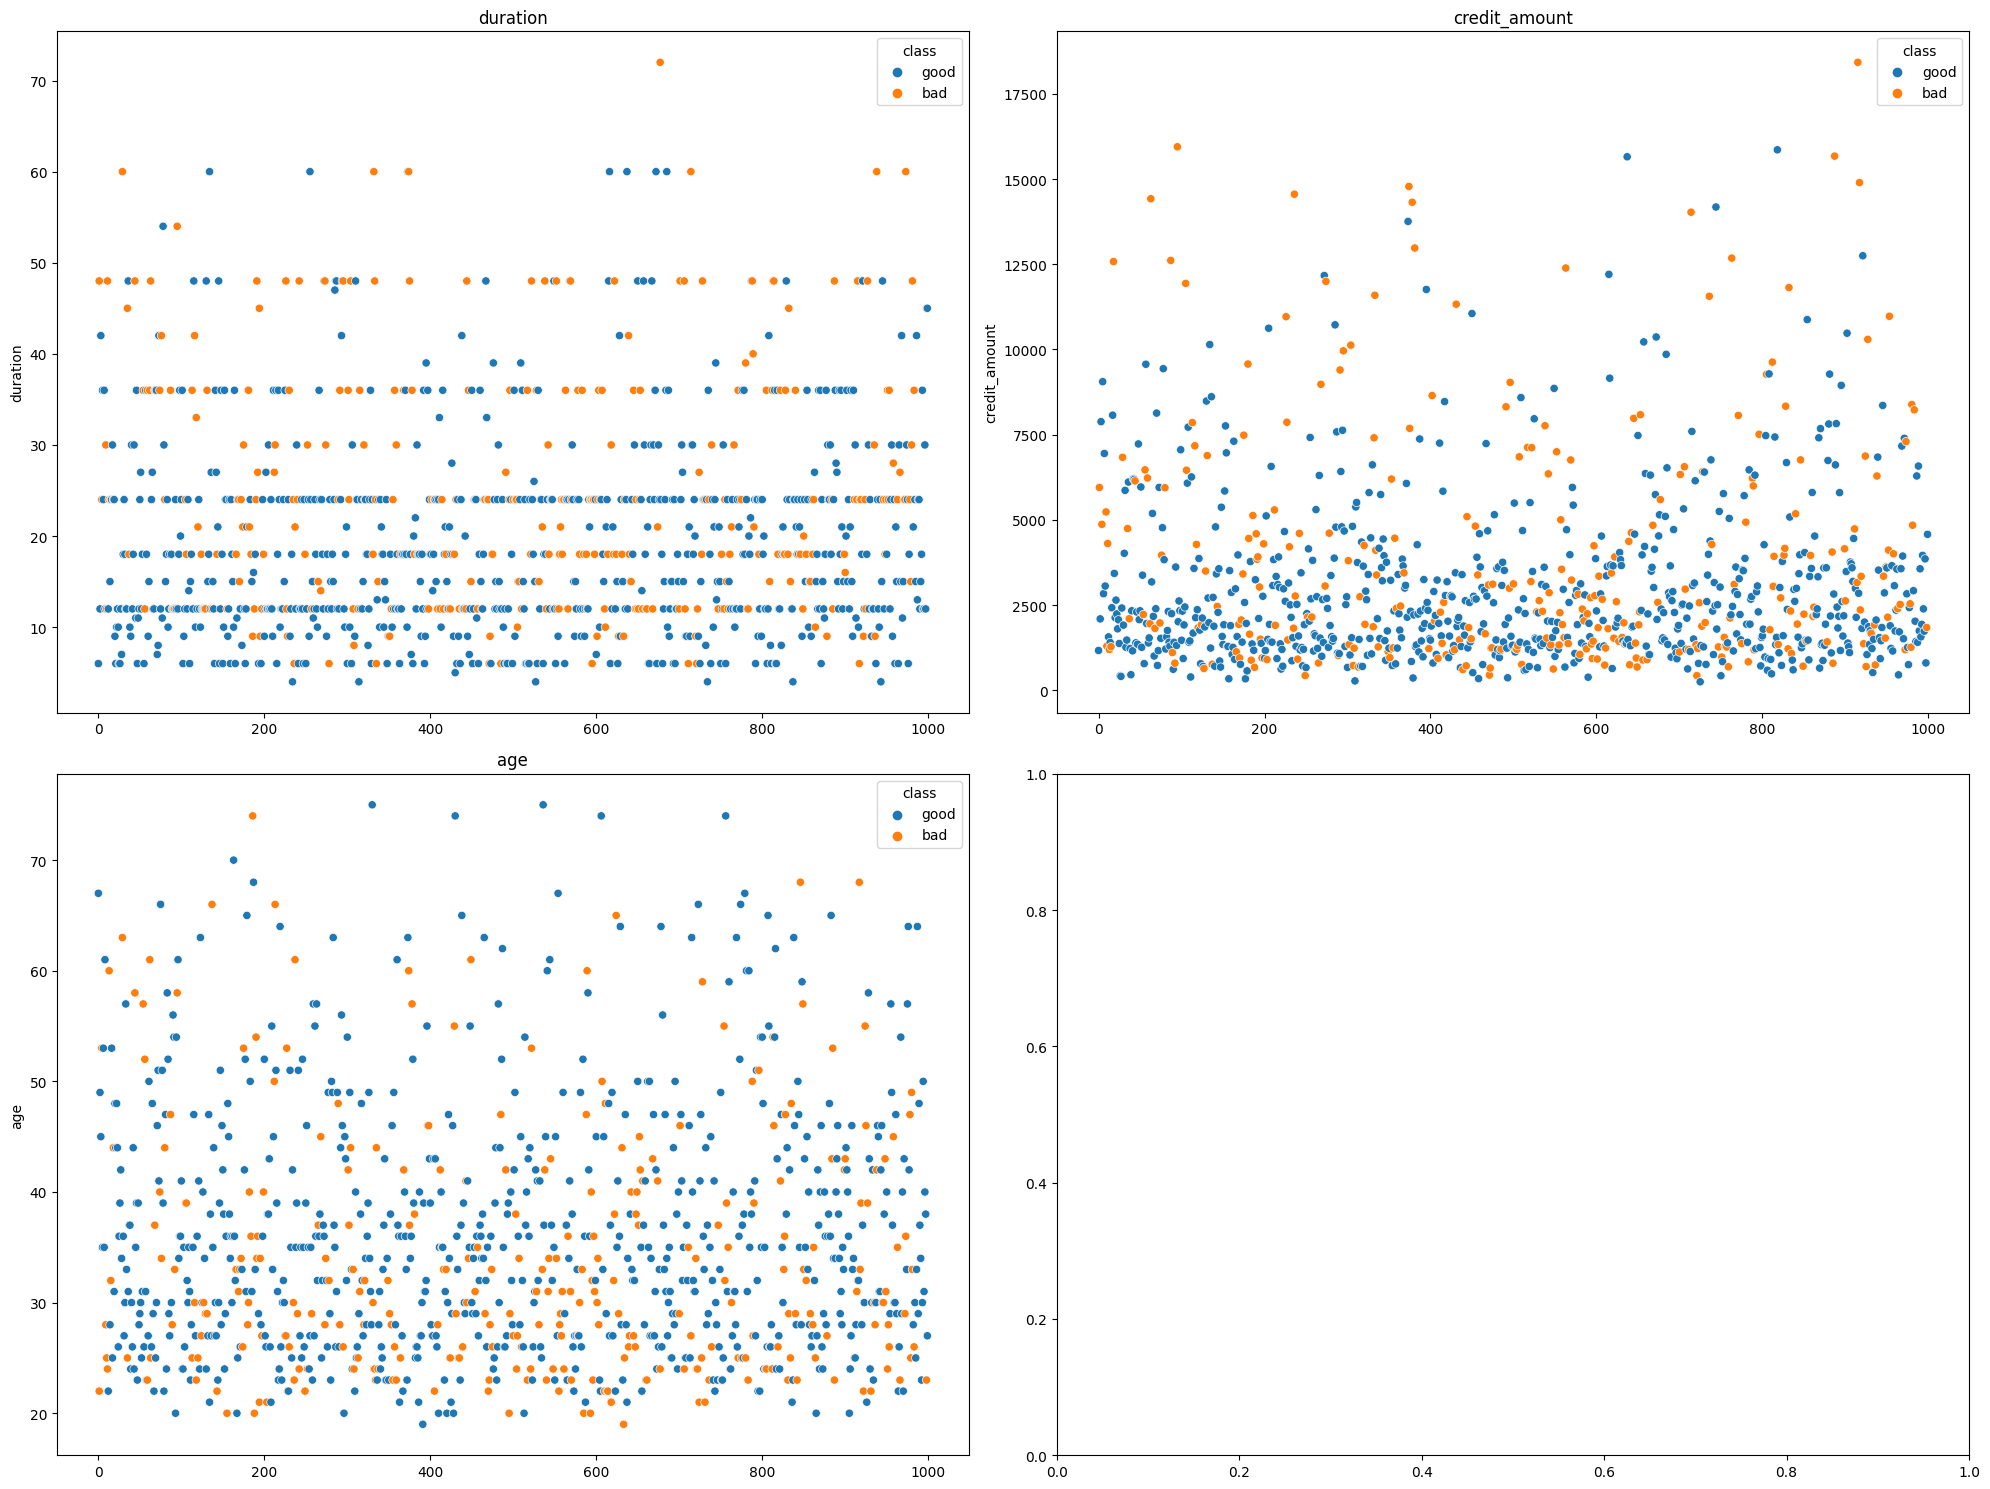

time: 2.55 s (started: 2023-06-27 14:03:48 +00:00)


In [24]:
continuous = ['duration', 'credit_amount', 'age']
fig, ax = plt.subplots(2, 2, figsize=(20, 15))
for name, axis in zip(dataset[continuous], ax.ravel()):
  sns.scatterplot(data=dataset, x=dataset.index, y=name, hue='class', ax=axis)
  axis.set_title(name)
plt.tight_layout()
plt.show()

# Train/Test split

# Feature engineering

# Model training